# Introduction

If you do not have experience with python, you can refer to this link to help you get started  
https://realpython.com/python-first-steps/
You are encouraged to look for other options/websites that you are more comfortable with.

Other materials and sources that can take advantage of are online educational websites like Lynda, Coursera, Edx, etc. If you sign in using your stanford id on Linda you will get access to free courses.  

Stanford also has great programming courses such as CS 106A which is a 3 unit class. If you prefer something fast paced and accelerated, you can take CME 193 which is a 1 unit class 

# Installing Packages/Modules

To get started open your anaconda environment by right clicking on the link and select "Run as an administrator"  
Upgrade pip to its latest version - https://pip.pypa.io/en/stable/installing/

If not already downloaded, download the following packages/modules 

pip  
numpy  
matplotlib  
pandas
geopandas  
folium  
csv  
os

How to download packages in conda environment - https://conda.io/docs/user-guide/tasks/manage-pkgs.html  /

# Part A - Creating a Bar Plot

In [2]:
import numpy as np
import geopandas as gpd
import folium
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os

Open the PG&E files and save them in dataframes using pd.read_csv function

What is a dataframe?  
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In [3]:
### Make sure there are no commas in the files as we are uploading it as csv (comma-separated values)

### Upload Electricity data

f = open('PGE_2017_Q1_ElectricUsageByZip.csv','r')
Q1E = pd.read_csv(f)
f = open('PGE_2017_Q2_ElectricUsageByZip.csv','r')
Q2E = pd.read_csv(f)
f = open('PGE_2017_Q3_ElectricUsageByZip.csv','r')
Q3E = pd.read_csv(f)
f = open('PGE_2017_Q4_ElectricUsageByZip.csv','r')
Q4E = pd.read_csv(f)

### Repeat the same steps for Gas files

f = open('PGE_2017_Q1_GasUsageByZip.csv','r')
Q1G = pd.read_csv(f)
f = open('PGE_2017_Q2_GasUsageByZip.csv','r')
Q2G = pd.read_csv(f)
f = open('PGE_2017_Q3_GasUsageByZip.csv','r')
Q3G = pd.read_csv(f)
f = open('PGE_2017_Q4_GasUsageByZip.csv','r')
Q4G = pd.read_csv(f)

Join the electricity and gas files using the append function.  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
    

In [4]:
### Join(Append) all the electricity data files

TempStep1 = Q1E.append(Q2E, ignore_index=True)
TempStep2 = TempStep1.append(Q3E, ignore_index=True)
Electricity = TempStep2.append(Q4E, ignore_index = True)

### Join(Append) all the gas data files

TempStep3 = Q1G.append(Q2G, ignore_index=True)
TempStep4 = TempStep3.append(Q3G, ignore_index=True)
Gas = TempStep4.append(Q4G, ignore_index = True)

Find out the column headers and data types of the table. 

In [5]:
print("Electricity")
print(Electricity.columns.values)
print(Electricity.dtypes)
print("="*50)
print("Gas")
print(Gas.columns.values)
print(Gas.dtypes)

Electricity
['ZIPCODE' 'MONTH' 'YEAR' 'CUSTOMERCLASS' 'COMBINED' 'TOTALCUSTOMERS'
 'TOTALKWH' 'AVERAGEKWH']
ZIPCODE             int64
MONTH               int64
YEAR                int64
CUSTOMERCLASS      object
COMBINED           object
TOTALCUSTOMERS      int64
TOTALKWH            int64
AVERAGEKWH        float64
dtype: object
Gas
['ZIPCODE' 'MONTH' 'YEAR' 'CUSTOMERCLASS' 'COMBINED' 'TOTALCUSTOMERS'
 'TOTALTHM' 'AVERAGETHM']
ZIPCODE             int64
MONTH               int64
YEAR                int64
CUSTOMERCLASS      object
COMBINED           object
TOTALCUSTOMERS      int64
TOTALTHM            int64
AVERAGETHM        float64
dtype: object


To look at the first five or last five rows of the table you can use the head and tail function. 

In [6]:
Electricity.tail()

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALKWH,AVERAGEKWH
33887,96137,12,2017,Elec- Residential,N,2714,1020561,376.0
33888,96161,9,2017,Elec- Residential,Y,0,0,NaN
33889,96161,10,2017,Elec- Residential,Y,0,0,NaN
33890,96161,11,2017,Elec- Residential,Y,0,0,NaN
33891,96161,12,2017,Elec- Residential,Y,0,0,NaN


In [7]:
Gas.head()

,ZIPCODE,MONTH,YEAR,CUSTOMERCLASS,COMBINED,TOTALCUSTOMERS,TOTALTHM,AVERAGETHM
0,92304,1,2017,Gas- Commercial,Y,0,0,NaN
1,92304,2,2017,Gas- Commercial,Y,0,0,NaN
2,92304,3,2017,Gas- Commercial,Y,0,0,NaN
3,92365,1,2017,Gas- Commercial,Y,0,0,NaN
4,92365,2,2017,Gas- Commercial,Y,0,0,NaN


In python, float value can only be multiplied with another float value. Hence, change the column type of TOTALKWH from int to float using astype function and multiply it with the appropriate conversion factor. Save this value into a new column.

Conversion Factors  

1 kWH = 3.41214 kBtu  
1 therm = 100 kBtu 

Follow this by changing the column headers for both Gas and Electricity dataframes to avoid confusion when joining the two. 

astype function - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html  
rename function - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

In [8]:
Electricity.TOTALKWH = Electricity.TOTALKWH.astype(float)
Electricity['TotalkBTU'] = Electricity['TOTALKWH'] * float(3.41214)
Electricity = Electricity.rename(index=str, columns={"COMBINED": "ELECCOMBINED", "TOTALCUSTOMERS": "ELECCUSTOMERS"})

Gas.TOTALTHM = Gas.TOTALTHM.astype(float)
Gas['TotalkBTU'] = Gas['TOTALTHM'] * 100
Gas = Gas.rename(index=str, columns={"COMBINED": "GASCOMBINED", "TOTALCUSTOMERS": "GASCUSTOMERS"})

Join (Concatenate) the two dataframes and save into a new dataframe

Concat function - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html  

In [9]:
MainData = pd.concat([Electricity,Gas], axis=0, ignore_index=True)
MainData.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(49020, 13)

Filter out non-residential Customerclass. Save to a new dataframe

| = OR  
& = AND

In [10]:
MonthlyData = MainData[(MainData.CUSTOMERCLASS == 'Elec- Residential') | (MainData.CUSTOMERCLASS == 'Gas- Residential')]

# Calculation for Question 4

Avg Energy use per month = Total Energy use/ Total # of customers

In [12]:
Electricity_temp = Electricity[(Electricity.CUSTOMERCLASS == 'Elec- Residential')]
AvgKWH_per_customer = Electricity_temp['TOTALKWH'].sum()/ Electricity_temp['ELECCUSTOMERS'].sum()
print ('Average KWH per customer annum = {}'.format(AvgKWH_per_customer*12))
Gas_temp = Gas[(Gas.CUSTOMERCLASS == 'Gas- Residential')]
AvgTHM_per_customer = Gas_temp['TOTALTHM'].sum()/ Gas_temp['GASCUSTOMERS'].sum()
print ('Average THM per customer annum = {}'.format(AvgTHM_per_customer*12))

print ('Average electricity kBTU per customer = {}'.format(AvgKWH_per_customer*12*3.41214))
print ('Average gas kBTU per customer = {}'.format(AvgTHM_per_customer*12*100))
print('Total KBTU = {}'.format(MainData['TotalkBTU'].sum()))

Average KWH per customer annum = 6464.064849534228
Average THM per customer annum = 414.8440464399523
Average electricity kBTU per customer = 22056.294235689722
Average gas kBTU per customer = 41484.40464399523
Total KBTU = 532306191463.6747


In [13]:
BarData = MonthlyData.groupby(['MONTH']).sum()
TotalKWH = []
TotalTHM = []
Temp5 = BarData['TOTALKWH'].tolist() 
Temp6 = BarData['TOTALTHM'].tolist()
TotalKWH = [i * 3.41214 for i in Temp5]
TotalTHM = [j * 100 for j in Temp6]
print (TotalKWH)
print (TotalTHM)

[9201286929.29772, 7129343386.6934395, 6851151097.2603, 6271880831.36298, 7065368412.92622, 8924820087.40764, 10622417747.19978, 10221957330.69312, 17308623492.34932, 6676827853.69494, 7145978780.5031395, 8769891085.91544]
[33298686300.0, 21475679500.0, 16769833100.0, 12891084400.0, 9358741200.0, 7405020500.0, 7093430000.0, 6953545100.0, 13675409000.0, 9254432700.0, 15615299900.0, 29224569900.0]


To aggrgrate data by months, use the group by function.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
    
Save the TOTALKWH and TOTALTHM columns in 2 separate lists and convert them into TOTALKBTU
    

Plot the data as a bar graph

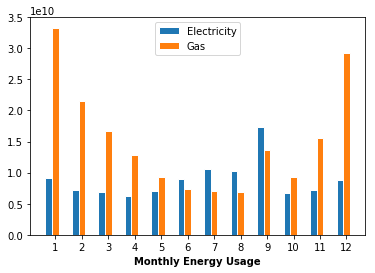

In [14]:
### Print bar plot

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = TotalKWH 
bars2 = TotalTHM 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1,  width=barWidth, edgecolor='white', label='Electricity')
plt.bar(r2, bars2,  width=barWidth, edgecolor='white', label='Gas')

 
# Add xticks on the middle of the group bars
plt.xlabel('Monthly Energy Usage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], range(1,13))
 
# Create legend & Show graphic
plt.legend()
plt.show()


# MAP

Lets go back to our Monthly Data dateframe.
Group the table by ZIPCODE, add TOTALKWH, TOTALTHM , TOTALKBTU, ELECUSTOMERS & GASCUSTOMERS  
Find the AVGKBTU

AVGKBTU = TOTALKBTU / Maximum(ELECUSTOMERS & GASCUSTOMERS)

Create a new dataframe containing Zipcode, TOTALKBTU and AVGKBTU

In [17]:
Temp7 = MonthlyData.groupby(['ZIPCODE'], as_index=False).sum()

Temp7["MaxCustomers"] = Temp7[["ELECCUSTOMERS", "GASCUSTOMERS"]].max(axis=1)
Temp7["AvgkBTU"] = (Temp7["TotalkBTU"]/Temp7["MaxCustomers"])*12
ZipData = Temp7[[ 'ZIPCODE', 'TotalkBTU','MaxCustomers', 'AvgkBTU']]
ZipData.head()


ZipData.to_csv('ZipData_sum.csv', encoding='utf-8')

Upload file/folder containing shape file

In [18]:
ca_zips2 = gpd.read_file("C:\\Users\\Disha Bhaiya\\Documents\\CEE 224X\\ca_zips")

Change the column name to make it easily identifiable.   
Merge(inner) the ZipData with JSON file

In [19]:
print(ca_zips2.columns.values)
ca_zips2.head()
ca_zips2.rename(columns = {"spatial_id":"ZIPCODE"}, inplace = True)
print(ca_zips2.columns.values)
ca_zips2["ZIPCODE"] = ca_zips2.ZIPCODE.astype(int)
ca_zips2 = ca_zips2.merge(ZipData, on = "ZIPCODE")
print(ca_zips2.columns.values)

['spatial_id' 'name' 'VALUE0' 'zip' 'geometry']
['ZIPCODE' 'name' 'VALUE0' 'zip' 'geometry']
['ZIPCODE' 'name' 'VALUE0' 'zip' 'geometry' 'TotalkBTU' 'MaxCustomers'
 'AvgkBTU']


Since, gdp.read_file() creates a dataframe, we must change the format back to json.

In [20]:
ca_json = ca_zips2.to_json()

Create a basemap
Map the choropleth and save the resulting map into a new HTML.


In [21]:
m = folium.Map(location=[30, -120], zoom_start=5)

m.choropleth(
    geo_data=ca_json,
    name='choropleth',
    data=ca_zips2,
    columns=['ZIPCODE', 'TotalkBTU'],
    key_on='feature.properties.ZIPCODE',
    fill_color='BuGn',
    legend_name='Total kBTU'
)

folium.LayerControl().add_to(m)

m.save('MyMap.html')